In [2]:
from mido import MidiFile, MidiTrack
import mido
import standardize
import importlib
import numpy as np

importlib.reload(standardize)

<module 'standardize' from '/media/manu/Data/PycharmProjects/thesis/src/standardize.py'>

In [433]:
filename = './data/Complete Examples Melodies/Jazz-Midi/All Of Me.mid'
# filename = './data/Complete Examples Melodies/Real Book/All Of Me.mid'

In [434]:
mid = MidiFile(filename)
tempo = standardize.get_tempo(filename)
time_signature = standardize.get_time_signature(filename)

In [435]:
mid

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=461537, time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('key_signature', key='C', time=0),
    MetaMessage('end_of_track', time=1)]),
  MidiTrack([
    MetaMessage('track_name', name='Vibes', time=0),
    Message('program_change', channel=0, program=11, time=0),
    Message('control_change', channel=0, control=0, value=56, time=0),
    Message('control_change', channel=0, control=32, value=0, time=0),
    Message('control_change', channel=0, control=123, value=0, time=0),
    Message('control_change', channel=0, control=93, value=56, time=3840),
    Message('control_change', channel=0, control=91, value=69, time=24),
    Message('note_on', channel=0, note=72, velocity=94, time=10060),
    Message('note_on', channel=0, note=72, velocity=0, time=945),
    Message('note_on', channel=0, note=67, ve

In [438]:
aom_notes = []
first = True
time = 0

tpb = mid.ticks_per_beat
print(tpb)

notes_on = {}

for m in mid:
    ticks = int(np.round(mido.second2tick(m.time, tpb, tempo)))
    time += ticks
    
    if m.type == 'note_on':
        if m.velocity > 0:
            if m.note not in notes_on:
                notes_on[m.note] = []
                
            notes_on[m.note].append(time)
        else: 
#             print(notes_on)
            if m.note in notes_on:
                note = {
                    'pitch': m.note,
                    'ticks': notes_on[m.note][0],
                    'offset': notes_on[m.note][0] % (tpb*time_signature[1]),
                    'measure': notes_on[m.note][0] / (tpb*time_signature[1]),
                    'duration': time - notes_on[m.note][0]
                }
                del notes_on[m.note][0]
                aom_notes.append(note)
aom_notes

480


[{'pitch': 72,
  'ticks': 13924,
  'offset': 484,
  'measure': 7.252083333333333,
  'duration': 945},
 {'pitch': 67,
  'ticks': 14903,
  'offset': 1463,
  'measure': 7.761979166666666,
  'duration': 308},
 {'pitch': 64,
  'ticks': 15222,
  'offset': 1782,
  'measure': 7.928125,
  'duration': 976},
 {'pitch': 67,
  'ticks': 16198,
  'offset': 838,
  'measure': 8.436458333333333,
  'duration': 153},
 {'pitch': 72,
  'ticks': 16360,
  'offset': 1000,
  'measure': 8.520833333333334,
  'duration': 304},
 {'pitch': 74,
  'ticks': 16669,
  'offset': 1309,
  'measure': 8.681770833333333,
  'duration': 191},
 {'pitch': 72,
  'ticks': 16858,
  'offset': 1498,
  'measure': 8.780208333333333,
  'duration': 285},
 {'pitch': 71,
  'ticks': 17146,
  'offset': 1786,
  'measure': 8.930208333333333,
  'duration': 652},
 {'pitch': 68,
  'ticks': 17792,
  'offset': 512,
  'measure': 9.266666666666667,
  'duration': 315},
 {'pitch': 64,
  'ticks': 18133,
  'offset': 853,
  'measure': 9.444270833333333,
  '

In [ ]:
# first = True
# dst_filename = filename.replace('Complete Examples Melodies', 'aligned_melodies')

# new_mid = MidiFile()
# new_mid.ticks_per_beat = mid.ticks_per_beat
# tpb = mid.ticks_per_beat

# for i, track in enumerate(mid.tracks):
#     new_track = MidiTrack()
#     new_mid.tracks.append(new_track)
#     for msg in track:
#         if msg.type == 'note_on' and first:
#             msg.time = msg.time % tpb
#             first = False
#         new_track.append(msg)

# print(new_mid)
        
# new_mid.save(dst_filename)

In [509]:
from jchord.progressions import ChordProgression, Song, SongSection

all_of_me = {
    'A': 'Cmaj7 -- -- -- -- -- -- -- E7 -- -- -- -- -- -- -- '
         'A7 -- -- -- -- -- -- -- Dm7 -- -- -- -- -- -- --',
    'B': 'E7 -- -- -- -- -- -- -- Am7 -- -- -- -- -- -- -- '
         'D7 -- -- -- -- -- -- -- Dm7 -- -- -- G7 -- -- --',
    'C': 'Fmaj7 -- -- -- Fm6 -- -- -- Em7 -- -- -- A7 -- -- -- ' 
         'Dm7 -- -- -- G7 -- -- -- C6 -- Ebdim7 -- Dm7 -- G7 --',
}
aom = ['A','B','A','C']


sections = []

for p in aom:
    progression = ChordProgression.from_string(all_of_me[p])
    ss = SongSection(name=p, progression=progression)
    sections.append(ss)

song = Song(sections)

In [ ]:
# from mingus.core import chords
# import mingus.core.notes as notes

# for p in all_of_me.values():
#     for c in p:
#         n = chords.from_shorthand(c)
#         n = [notes.int_to_note(notes.note_to_int(x)) for x in n]
        
#         print(c, n)

In [537]:
def chord_note_score(c, n):
    if type(c) == float or type(n) == float:
        return np.nan

    c = chords.from_shorthand(c)
    n = notes.int_to_note(n % 12)

    notes_c = [notes.int_to_note(notes.note_to_int(x)) for x in c]
    
    # if key.mode == 'major':
    #     self.key_scale = music21.scale.MajorScale(key.tonic)
    # elif key.mode == 'minor':
    #     self.key_scale = music21.scale.MinorScale(key.tonic)

    if n in notes_c:
        return 1
    else:
        return 0

In [568]:
all_scores = []
rng = 500
step = 1/4

for y in range(-rng, rng):
    m = y * step
    song_scores = []
    
    print(m)

    for section in song.sections:
        for chord in section.progression.progression:
            pitches = [x['pitch'] for x in aom_notes if m <= x['measure'] < m+step]

            scores = []
            
#             print(chord)

            for pitch in pitches:
                scores.append(chord_note_score(chord.name, pitch))

            score = np.mean(scores) if len(scores) > 0 else 0.5
            
#             if y == 14:
#                 print(m, c, pitches, score)

            song_scores.append(score)

            m+=step

    song_score = np.nanmean(song_scores) 
    all_scores.append(song_score)

-125.0
-124.75
-124.5
-124.25
-124.0
-123.75
-123.5
-123.25
-123.0
-122.75
-122.5
-122.25
-122.0
-121.75
-121.5
-121.25
-121.0
-120.75
-120.5
-120.25
-120.0
-119.75
-119.5
-119.25
-119.0
-118.75
-118.5
-118.25
-118.0
-117.75
-117.5
-117.25
-117.0
-116.75
-116.5
-116.25
-116.0
-115.75
-115.5
-115.25
-115.0
-114.75
-114.5
-114.25
-114.0
-113.75
-113.5
-113.25
-113.0
-112.75
-112.5
-112.25
-112.0
-111.75
-111.5
-111.25
-111.0
-110.75
-110.5
-110.25
-110.0
-109.75
-109.5
-109.25
-109.0
-108.75
-108.5
-108.25
-108.0
-107.75
-107.5
-107.25
-107.0
-106.75
-106.5
-106.25
-106.0
-105.75
-105.5
-105.25
-105.0
-104.75
-104.5
-104.25
-104.0
-103.75
-103.5
-103.25
-103.0
-102.75
-102.5
-102.25
-102.0
-101.75
-101.5
-101.25
-101.0
-100.75
-100.5
-100.25
-100.0
-99.75
-99.5
-99.25
-99.0
-98.75
-98.5
-98.25
-98.0
-97.75
-97.5
-97.25
-97.0
-96.75
-96.5
-96.25
-96.0
-95.75
-95.5
-95.25
-95.0
-94.75
-94.5
-94.25
-94.0
-93.75
-93.5
-93.25
-93.0
-92.75
-92.5
-92.25
-92.0
-91.75
-91.5
-91.25
-91.0
-90.75
-9

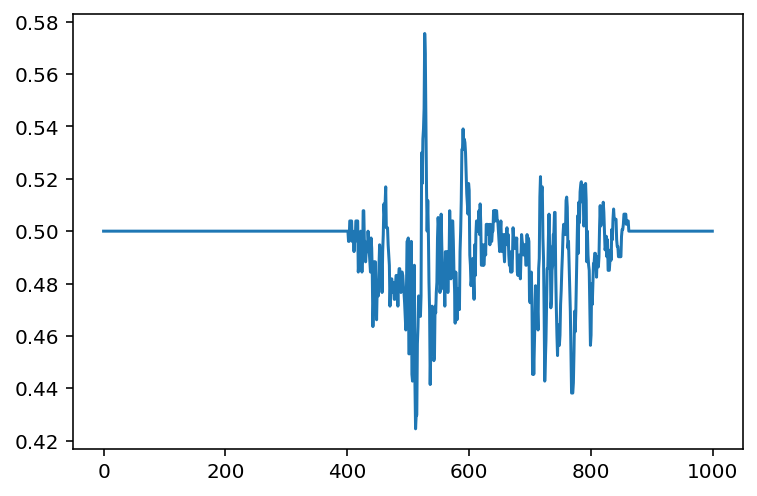

In [567]:
from matplotlib import pyplot as plt
plt.plot(all_scores)

In [1]:
print(np.quantile(all_scores, 0.9999) - np.quantile(all_scores, 0.999))

NameError: name 'np' is not defined

In [551]:
j = 3
top_idx = np.array(sorted(range(len(all_scores)), key=lambda i: all_scores[i])[-j:]) - rng
top_val = np.array(sorted(all_scores)[-j:])

print(top_idx)
print(top_val)

[26 28 27]
[0.546875   0.56770833 0.57552083]


In [552]:
sorted(all_scores)[-j:]

[0.546875, 0.5677083333333333, 0.5755208333333333]

In [563]:

step = 4
found = False
j = 1                      
while not found:
    top_idx = np.array(sorted(range(len(all_scores)), key=lambda i: all_scores[i])[-j]) - rng
    print(top_idx)
    if top_idx % step == 0:
        found = True
        starting_measure = top_idx // step
    else:
        j+=1

27
28


In [564]:
starting_measure

7